In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import tensorflow as tf

%matplotlib inline

In [2]:
train_df = pd.read_csv("data/houseprice/train.csv")
test_df = pd.read_csv("data/houseprice/test.csv")

In [3]:
train_df.shape

(1460, 81)

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#이산형에서 특정 값이 너무 많은 경우(99%가 동일한 값이라던가)이런때를 제외시켜주고 싶은데 어케해야되는지를 모르겠다
def dropcol(data):
    for col, item in data.iteritems():
        if data[col].isnull().sum().sum() > 1000:
            data.drop([col],axis=1, inplace=True)
        elif (data[col].nunique()) > 1000:
            data.drop([col],axis=1, inplace=True)

#두 조건 전부 약간의 특성을 감소시키므로 이후 딱히 건드리지 말것!!
dropcol(train_df)
dropcol(test_df)

In [6]:
train_df.shape

(1460, 75)

In [7]:
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
corr_matrix = train_df.corr()

In [9]:
corr_matrix["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [10]:
corr_matrix["SalePrice"].sort_values(ascending=True).head(10)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
Name: SalePrice, dtype: float64

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

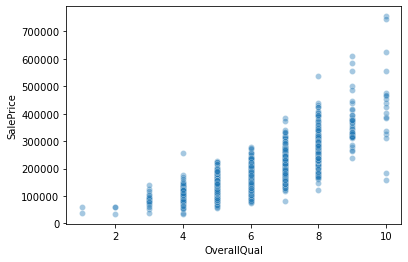

In [11]:
sns.scatterplot(train_df["OverallQual"], train_df["SalePrice"], alpha=0.4)

In [12]:
train_df["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

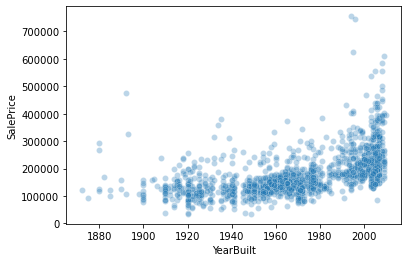

In [13]:
sns.scatterplot(train_df["YearBuilt"], train_df["SalePrice"], alpha=0.3)

In [14]:
###### 임시 성능 평가 ++ 컬럼 뽑아내는거 chk'
train_label = train_df["SalePrice"]
train_df = train_df[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath","TotRmsAbvGrd","YearBuilt"]]
train_df, test_df, train_label, test_label = train_test_split(train_df, train_label)

In [15]:
train_df = StandardScaler().fit_transform(train_df)
test_df = StandardScaler().fit_transform(test_df)

In [16]:
train_df.shape

(1095, 9)

In [22]:
model = keras.Sequential()
input_ = keras.layers.Input(shape=train_df.shape[1])
hidden1 = keras.layers.Dense(9, activation="relu")(input_)
hidden2 = keras.layers.Dense(9, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(9, activation="relu")(hidden2)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss = "mse")

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 10)           100         input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 9)            99          dense_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 9)            90          dense_5[0][0]                    
____________________________________________________________________________________________

In [24]:
hist = model.fit(train_df, train_label, validation_split=0.1, epochs=10)

Epoch 1/10
31/31 [==============================] - 0s 3ms/step - loss: 39604219904.0000 - val_loss: 35892461568.0000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 39603720192.0000 - val_loss: 35891908608.0000
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 39603019776.0000 - val_loss: 35891134464.0000
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 39602020352.0000 - val_loss: 35890036736.0000
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 39600631808.0000 - val_loss: 35888549888.0000
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 39598833664.0000 - val_loss: 35886628864.0000
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 39596449792.0000 - val_loss: 35884097536.0000
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 39593451520.0000 - val_loss: 35880923136.0000
Epoch 9/10
31/31 [==============================] - 0s 1

In [25]:
np.sqrt(mean_squared_error(test_label, model.predict(test_df)))

196059.01169351913